# CROP RECOMMENDATION SYSTEM 

In [1]:
# Importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree


In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

muskmelon      100
banana         100
kidneybeans    100
lentil         100
papaya         100
mungbean       100
mothbeans      100
mango          100
pigeonpeas     100
grapes         100
blackgram      100
coconut        100
jute           100
rice           100
apple          100
pomegranate    100
coffee         100
watermelon     100
maize          100
cotton         100
orange         100
chickpea       100
Name: label, dtype: int64

### Seperating features and target label

In [11]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [12]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [13]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target)

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier()

#training a model
DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  99.45454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        27
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        24
        jute       0.95      0.95      0.95        19
 kidneybeans       1.00      1.00      1.00        21
      lentil       1.00      0.97      0.98        31
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        22
   mothbeans       0.97      1.00      0.98        29
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [17]:
score

array([0.99090909, 0.98409091, 0.99090909, 0.99090909, 0.98409091])

### Saving trained Decision Tree model

In [18]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9545454545454546
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        27
   blackgram       0.83      0.96      0.89        25
    chickpea       1.00      1.00      1.00        26
     coconut       0.93      1.00      0.96        25
      coffee       0.96      0.85      0.90        26
      cotton       0.90      0.90      0.90        20
      grapes       1.00      1.00      1.00        24
        jute       0.75      0.95      0.84        19
 kidneybeans       0.95      1.00      0.98        21
      lentil       0.94      0.97      0.95        31
       maize       0.87      0.87      0.87        23
       mango       1.00      1.00      1.00        22
   mothbeans       1.00      0.86      0.93        29
    mungbean       1.00      0.93      0.96        29
   muskmelon       1.00      1.00      1.00        21
      orange       1.00   

C:\Users\swapnil amin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9981818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        27
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        24
        jute       0.95      1.00      0.97        19
 kidneybeans       1.00      1.00      1.00        21
      lentil       1.00      1.00      1.00        31
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        22
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00

In [22]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

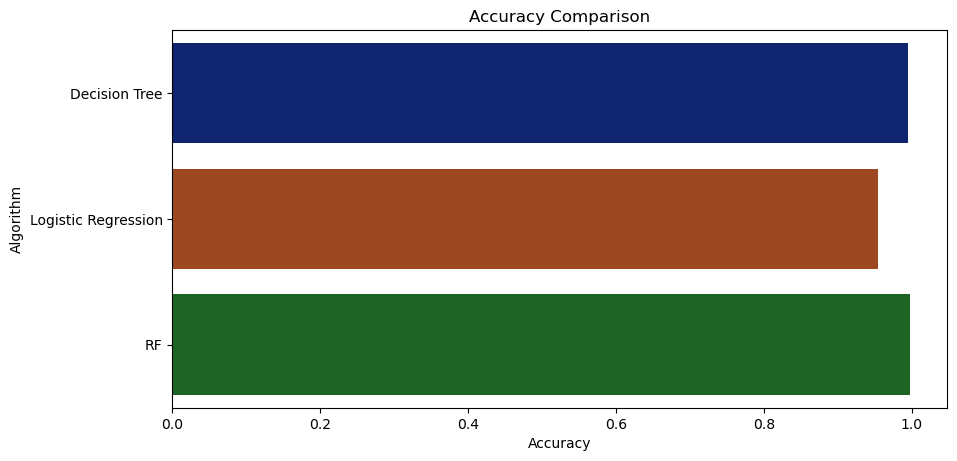

In [23]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

## Making a prediction

In [24]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [25]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
